In [ ]:
!pip install transformers

In [ ]:
!pip install pandas nltk seaborn matplotlib
import pandas as pd         #helps to organize data,like putting tweets into a clean table
import nltk                 #tool for working with words , like cleaning texts
from nltk.corpus import stopwords #grabs specific part of nltk like a list of common words(lek 'the' or 'and') which you will remove fromt weets to focus on important words
import re                         #regular expression , helps you to clean text by removing commas and exclamation marks!
from transformers import pipeline # brings pipeline took from hugging face , which makes it easy to use AI models, like the one that checks if tweets are happy or sad
import seaborn as sns
import matplotlib.pyplot as plt    #both seaborn and matplotlib used for showing results,like happy or sad!
from collections import Counter    #count tweets
nltk.download('stopwords')         #downloads a list of common words, so you can use it to clean your tweets

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
data=pd.read_csv('twitter_dataset.csv')
data.head()
texts=data[['Text']]   #extracts only the text column from the dataframe data(it contains tweets which are to be analyzed)

In [ ]:
texts['LowerText'] =texts['Text'].str.lower()    #convert all the tweets into lower case
texts['RemovePunc']=texts['LowerText'].apply(lambda x:re.sub(r'[^\w\s]','',x))       #removes punctuation using regex pattern
STOPWORDS=set(stopwords.words('english'))       #loads common words like 'and','or','the' to ignore
texts['RemoveStopwords']=texts['RemovePunc'].apply(lambda x:''.join([word for word in x.split() if word not in STOPWORDS])) #removes loaded stopwords , keeping only meaningful part

/tmp/ipython-input-5-2436366619.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texts['LowerText'] =texts['Text'].str.lower()    #convert all the tweets into lower case
/tmp/ipython-input-5-2436366619.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texts['RemovePunc']=texts['LowerText'].apply(lambda x:re.sub(r'[^\w\s]','',x))       #removes punctuation using regex pattern
/tmp/ipython-input-5-2436366619.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [ ]:
sentiment_analyzer=pipeline("sentiment-analysis",
model="distilbert-base-uncased-finetuned-sst-2-english")

Device set to use cpu


In [ ]:
texts['Sentiment']=texts['RemoveStopwords'].map(lambda x:      #sends each cleaned tweet to the sentiment analyzer,model analyzes each tweet individually
sentiment_analyzer(x)[0]['label'].lower())                     #gets the sentiment(POSITIVE/NEGATIVE) and convert to lowercase

Counter({'negative': 10000})


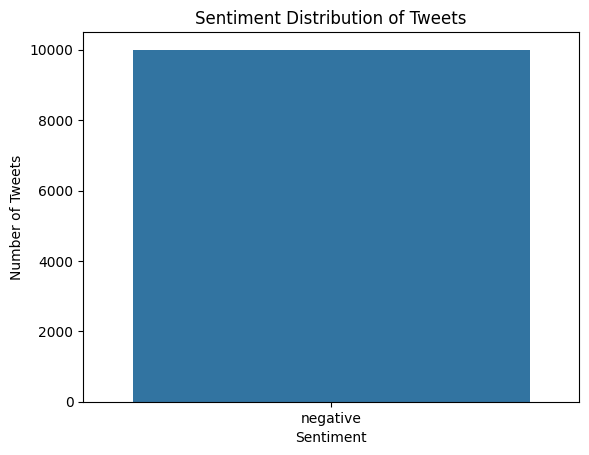

In [ ]:

# Count and plot
counter = Counter(texts['Sentiment'])
print(counter)

sns.barplot(x=list(counter.keys()), y=list(counter.values()))
plt.xlabel('Sentiment')
plt.ylabel("Number of Tweets")
plt.title("Sentiment Distribution of Tweets")
plt.show()
                                                  #shows the plot



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Device set to use cpu


Counter({'negative': 7531, 'positive': 2469})


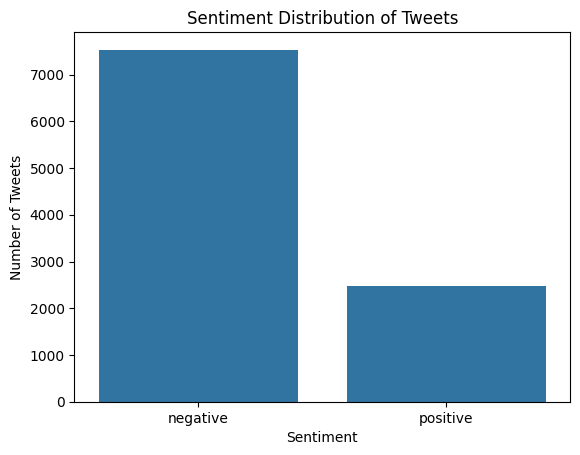

In [ ]:
import pandas as pd
import re
import nltk
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from transformers import pipeline

# Download stopwords
nltk.download('stopwords')

# Load your CSV
texts = pd.read_csv("twitter_dataset.csv")  # Adjust path if needed

# Text cleaning
texts['LowerText'] = texts['Text'].str.lower()
texts['RemovePunc'] = texts['LowerText'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
STOPWORDS = set(stopwords.words('english'))
texts['RemoveStopwords'] = texts['RemovePunc'].apply(lambda x: ' '.join([word for word in x.split() if word not in STOPWORDS]))

# Load sentiment analyzer
sentiment_analyzer = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Analyze sentiment
texts['Sentiment'] = texts['RemoveStopwords'].map(lambda x: sentiment_analyzer(x)[0]['label'].lower())

# Plot sentiment distribution
counter = Counter(texts["Sentiment"])
print(counter)
sns.barplot(x=list(counter.keys()), y=list(counter.values()))
plt.xlabel('Sentiment')
plt.ylabel("Number of Tweets")
plt.title("Sentiment Distribution of Tweets")
plt.show()